<a href="https://colab.research.google.com/github/forestnoon/BMI/blob/master/%E3%82%A2%E3%83%A4%E3%83%A1%E3%81%AE%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#アヤメの分類

##データの読み込み

In [ ]:
#ライブラリの読み込み
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#irisデータセット
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [ ]:
#キーの一覧
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
#説明変数をデータフレーム化
iris_data_df = pd.DataFrame(iris_dataset.data,columns=iris_dataset.feature_names)
iris_data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#目的変数をデータフレーム化
iris_target_df = pd.DataFrame(iris_dataset.target,columns=['y'])
iris_target_df.head()


,y
0,0
1,0
2,0
3,0
4,0


#決定木を使って学習

In [ ]:
#訓練データとテストデータの分離
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    iris_data_df,iris_target_df,random_state=0
)

#トレーニングデータの確認
print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('=======================')

#テストデータの確認
print("X_test shape:{}".format(X_test.shape))
print("y_test shape:{}".format(y_test.shape))

X_train shape:(112, 4)
y_train shape:(112, 1)
X_test shape:(38, 4)
y_test shape:(38, 1)


In [ ]:
#決定木クラス分類器のオブジェクトを作成
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(random_state=0)

#決定木クラス分類器を訓練
model = decisiontree.fit(X_train,y_train)

#精度の確認
print('トレーニングデータの精度:{}'.format(model.score(X_train,y_train)))
print('テストデータの精度:{}'.format(model.score(X_test,y_test)))

トレーニングデータの精度:1.0
テストデータの精度:0.9736842105263158


#グラフの描画

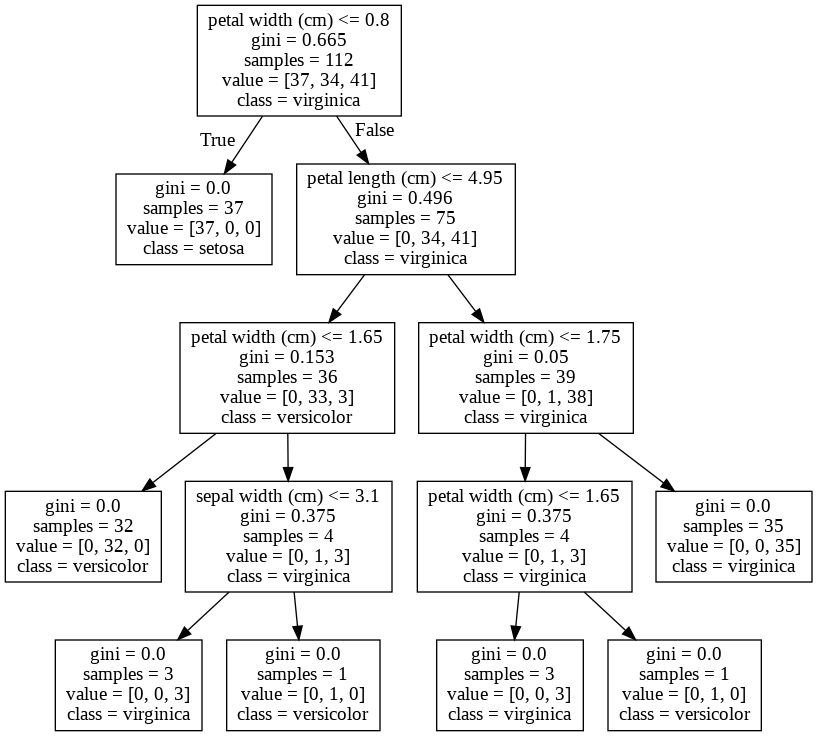

In [ ]:
import pydotplus
from IPython.display import Image
from sklearn import tree

#DOTフォーマットで、データを作成
dot_data = tree.export_graphviz(
    decisiontree,
    out_file=None,
    feature_names=iris_dataset.feature_names,
    class_names=iris_dataset.target_names
)

#グラフを描画
graph = pydotplus.graph_from_dot_data(dot_data)

#グラフを表示
Image(graph.create_png())

#学習済みモデルを保存

In [ ]:
# from google.colab import files
# import pickle
# with open('model.pickle',mode='wb') as f:
#   pickle.dump(model,f)
# files.download('model.pickle')